In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

In [ ]:
dataset.head()

In [ ]:
dataset = dataset.drop(columns = ['Sl no'])

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 636 entries, 0 to 635
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   V       636 non-null    float64
 1   S       636 non-null    float64
 2   B       636 non-null    float64
 3   A       636 non-null    float64
 4   M       636 non-null    float64
 5   BO      636 non-null    float64
 6   C       636 non-null    float64
 7   R       636 non-null    float64
 8   D       636 non-null    int64  
 9   SL      636 non-null    float64
 10  P       636 non-null    float64
 11  ST      636 non-null    int64  
 12  GW      636 non-null    int64  
 13  LW      636 non-null    int64  
dtypes: float64(10), int64(4)
memory usage: 69.7 KB


In [ ]:
X = dataset.iloc[:,:-1]
Y = dataset.iloc[:,-1]

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_predict
from sklearn.linear_model import LinearRegression
from math import sqrt

In [ ]:
cv = KFold(n_splits= 10, shuffle = False)
classifier_pipeline = make_pipeline(StandardScaler(), KNeighborsRegressor(n_neighbors = 10))
y_pred = cross_val_predict(classifier_pipeline, X,Y,cv=cv)
print("RMSE: " + str(round(sqrt(mean_squared_error(Y,y_pred)),2)))
print("R_squared: " + str(round(sqrt(r2_score(Y,y_pred)),2)))

RMSE: 0.65
R_squared: 0.25


In [ ]:
print(y_pred)

[1.6 1.9 1.3 1.6 1.8 1.9 2.  1.5 2.1 3.3 3.1 2.2 2.1 2.2 2.1 2.  2.1 2.
 2.3 2.  2.2 2.  2.2 2.  1.9 2.  2.1 1.7 2.  1.3 2.6 2.1 2.5 1.8 1.7 1.7
 1.7 1.7 2.9 1.7 1.8 2.2 2.2 1.8 1.9 2.3 2.2 2.1 1.9 2.1 1.9 2.1 1.9 2.1
 2.  2.1 2.  1.9 2.  1.9 2.5 2.8 2.5 1.8 1.4 1.6 1.8 1.7 1.8 1.6 2.  2.3
 1.9 2.  1.8 2.  2.2 2.4 2.  1.9 1.6 1.7 2.2 2.2 2.2 2.1 1.9 2.1 2.1 1.6
 2.1 1.8 1.8 1.8 1.7 1.8 1.4 1.7 1.3 1.5 1.9 1.7 2.  2.  1.9 1.9 1.7 1.8
 1.9 1.5 1.4 1.7 2.  2.1 2.1 2.2 2.  2.3 1.8 1.7 1.7 1.9 1.8 2.  1.6 1.5
 1.5 1.2 1.6 1.9 1.7 1.9 2.1 1.9 2.  1.7 1.6 1.7 1.8 1.9 1.6 1.9 1.6 1.7
 2.  2.  1.7 1.7 1.8 1.8 1.4 1.5 1.4 1.9 1.8 1.7 1.5 1.7 2.1 1.9 2.  2.5
 1.6 1.5 1.8 1.8 2.  2.  2.3 2.2 1.4 1.4 1.9 2.  2.2 2.1 2.4 2.  2.7 2.
 1.9 2.3 2.4 1.5 2.2 1.9 2.1 2.3 1.7 3.2 3.1 2.  1.7 1.9 1.7 1.9 1.8 1.6
 1.8 2.1 2.1 2.1 2.1 1.9 2.  2.2 2.1 1.9 1.7 1.8 1.6 1.9 1.7 1.6 1.6 1.8
 2.  1.9 1.6 2.9 3.1 2.9 2.1 1.9 1.5 2.1 1.5 2.1 2.  2.3 2.2 2.  2.2 2.
 2.2 2.3 1.8 1.9 2.3 2.  1.5 1.8 1.8 1.8 1.9 1.9 1.8 1

**Feature Variance**

In [ ]:
dataset.var()

V      37635.068672
S     106481.463426
B      16181.201715
A       9383.367692
M          0.000176
BO         0.000162
C          0.000020
R          0.000051
D          8.350109
SL         0.346447
P         81.533616
ST         0.493379
GW         3.358520
LW         0.455049
dtype: float64

In [ ]:
X = X.drop(columns = ['M','BO','C','R','SL','ST'])

In [ ]:
print("RMSE: " + str(round(sqrt(mean_squared_error(Y,y_pred)),2)))
print("R_squared: " + str(round(sqrt(r2_score(Y,y_pred)),2)))

RMSE: 0.65
R_squared: 0.25


**Filter features by correlation**

In [ ]:
import seaborn as sn
import matplotlib.pyplot as plt

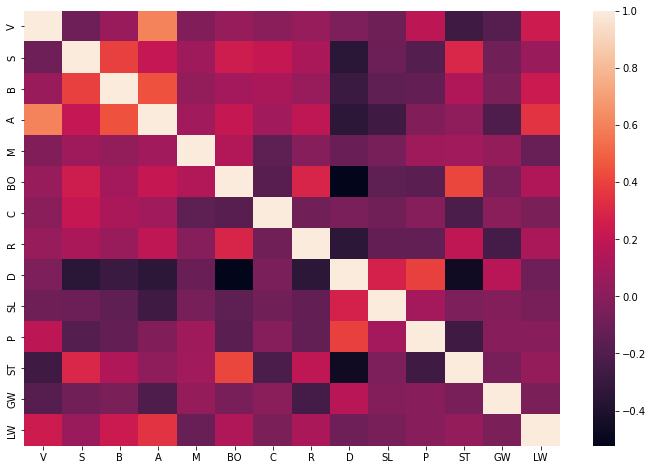

In [ ]:
fig_dims = (12,8)
fig, ax = plt.subplots(figsize = fig_dims)
sn.heatmap(dataset.corr(), ax= ax)
plt.show()

In [ ]:
dataset.corr()["LW"]

V     0.242925
S     0.060368
B     0.238306
A     0.349617
M    -0.114296
BO    0.136887
C    -0.045181
R     0.123031
D    -0.091393
SL   -0.056959
P    -0.002229
ST    0.042684
GW   -0.042638
LW    1.000000
Name: LW, dtype: float64

In [ ]:
abs(dataset.corr()["LW"][abs(dataset.corr()["LW"])>0.5].drop("LW")).index.tolist()

[]

In [ ]:
vals = [0.1 , 0.2, 0.3, 0.4, 0.5, 0.6, 0.7]
for val in vals:
  features = abs(dataset.corr()["LW"][abs(dataset.corr()["LW"])>0.2].drop("LW")).index.tolist()

  X = dataset.drop(columns = 'LW')
  X = X[features]

  print(features)

  y_pred = cross_val_predict(classifier_pipeline, X, Y, cv=cv)
  print("RMSE: " + str(round(sqrt(mean_squared_error(Y,y_pred)),2)))
  print("R_squared: " + str(round(sqrt(r2_score(Y,y_pred)),2)))


['V', 'B', 'A']
RMSE: 0.67
R_squared: 0.12
['V', 'B', 'A']
RMSE: 0.67
R_squared: 0.12
['V', 'B', 'A']
RMSE: 0.67
R_squared: 0.12
['V', 'B', 'A']
RMSE: 0.67
R_squared: 0.12
['V', 'B', 'A']
RMSE: 0.67
R_squared: 0.12
['V', 'B', 'A']
RMSE: 0.67
R_squared: 0.12
['V', 'B', 'A']
RMSE: 0.67
R_squared: 0.12


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/ML/MC.csv')
df = df.drop(columns = ['Sl no'])
X = df.drop(columns='LW')
y = df.LW

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 636 entries, 0 to 635
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   V       636 non-null    float64
 1   S       636 non-null    float64
 2   B       636 non-null    float64
 3   A       636 non-null    float64
 4   M       636 non-null    float64
 5   BO      636 non-null    float64
 6   C       636 non-null    float64
 7   R       636 non-null    float64
 8   D       636 non-null    int64  
 9   SL      636 non-null    float64
 10  P       636 non-null    float64
 11  ST      636 non-null    int64  
 12  GW      636 non-null    int64  
 13  LW      636 non-null    int64  
dtypes: float64(10), int64(4)
memory usage: 69.7 KB


In [ ]:
X

,V,S,B,A,M,BO,C,R,D,SL,P,ST,GW
0,134.164002,30.000000,0.000000,30.000000,0.019974,0.001929,0.012552,0.003037,9,0.309161,0.0,1,6
1,271.661987,30.000000,0.000000,30.000000,0.017091,0.004117,0.011791,0.004424,9,1.605640,0.0,2,4
2,42.426399,60.000000,30.000000,0.000000,0.015338,0.005184,0.008571,0.007387,8,0.460710,0.0,1,5
3,108.167000,94.868301,30.000000,0.000000,0.015114,0.008967,0.004393,0.011278,9,0.460710,0.0,2,5
4,67.082001,60.000000,30.000000,0.000000,0.016481,0.013518,0.000992,0.013786,10,1.545440,0.0,2,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
631,0.000000,804.984009,90.000000,60.000000,0.020994,0.000455,0.000444,0.003706,8,1.151530,0.0,3,3
632,0.000000,349.856995,67.082001,30.000000,0.015972,0.001875,0.002807,0.000434,8,0.341370,0.0,3,3
633,30.000000,212.132004,123.693001,0.000000,0.010997,0.001286,0.001331,0.001735,5,1.381420,0.0,3,7
634,60.000000,30.000000,0.000000,30.000000,0.001639,0.002033,0.001985,0.001735,7,0.460553,0.0,3,3


In [ ]:
y

0      3
1      2
2      2
3      1
4      1
      ..
631    1
632    2
633    2
634    2
635    2
Name: LW, Length: 636, dtype: int64

In [ ]:
!pip install mlxtend
import joblib
import sys
sys.modules['sklearn.externals.joblib'] = joblib
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

In [ ]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.linear_model import LinearRegression
# Sequential Forward Selection(sfs)
sfs = SFS(LinearRegression(),
          k_features=13,
          forward=True,
          floating=False,
          scoring = 'r2',
          cv = 0)

In [ ]:
sfs.fit(X,y)

SequentialFeatureSelector(cv=0, estimator=LinearRegression(), k_features=13,
                          scoring='r2')

In [ ]:
sfs.subsets_

{1: {'avg_score': 0.12223235646081987,
  'cv_scores': array([0.12223236]),
  'feature_idx': (3,),
  'feature_names': ('A',)},
 2: {'avg_score': 0.14334792828919873,
  'cv_scores': array([0.14334793]),
  'feature_idx': (3, 4),
  'feature_names': ('A', 'M')},
 3: {'avg_score': 0.15333903006397465,
  'cv_scores': array([0.15333903]),
  'feature_idx': (3, 4, 6),
  'feature_names': ('A', 'M', 'C')},
 4: {'avg_score': 0.16319221755217417,
  'cv_scores': array([0.16319222]),
  'feature_idx': (2, 3, 4, 6),
  'feature_names': ('B', 'A', 'M', 'C')},
 5: {'avg_score': 0.16731185270593796,
  'cv_scores': array([0.16731185]),
  'feature_idx': (2, 3, 4, 5, 6),
  'feature_names': ('B', 'A', 'M', 'BO', 'C')},
 6: {'avg_score': 0.17264402549819557,
  'cv_scores': array([0.17264403]),
  'feature_idx': (2, 3, 4, 5, 6, 8),
  'feature_names': ('B', 'A', 'M', 'BO', 'C', 'D')},
 7: {'avg_score': 0.17481667897485886,
  'cv_scores': array([0.17481668]),
  'feature_idx': (2, 3, 4, 5, 6, 7, 8),
  'feature_names'

In [ ]:
X = df.drop(columns='LW')[['V',
   'S',
   'B',
   'A',
   'M',
   'BO',
   'C',
   'R',
   'D',
   'SL',
   'P',
   'ST',
   'GW']]
y = df.LW
y_pred = cross_val_predict(classifier_pipeline, X,Y,cv=cv)
print("RMSE: " + str(round(sqrt(mean_squared_error(y,y_pred)),2)))
print("R_squared: " + str(round(sqrt(r2_score(y,y_pred)),2)))

RMSE: 0.65
R_squared: 0.25


In [ ]:
sfs1 = SFS(classifier_pipeline,
          k_features=13,
          forward=True,
          scoring = 'neg_mean_squared_error',
          cv = cv)

In [ ]:
sfs1.fit(X,y)

SequentialFeatureSelector(cv=KFold(n_splits=10, random_state=None, shuffle=False),
                          estimator=Pipeline(steps=[('standardscaler',
                                                     StandardScaler()),
                                                    ('kneighborsregressor',
                                                     KNeighborsRegressor(n_neighbors=10))]),
                          k_features=13, scoring='neg_mean_squared_error')

In [ ]:
sfs1.subsets_

{1: {'avg_score': -0.488482142857143,
  'cv_scores': array([-0.61265625, -0.75671875, -0.564375  , -0.67609375, -0.2971875 ,
         -0.42921875, -0.4647619 , -0.35761905, -0.31444444, -0.41174603]),
  'feature_idx': (9,),
  'feature_names': ('SL',)},
 2: {'avg_score': -0.44344518849206355,
  'cv_scores': array([-0.55890625, -0.6915625 , -0.4984375 , -0.56921875, -0.2596875 ,
         -0.45171875, -0.36333333, -0.31952381, -0.27968254, -0.44238095]),
  'feature_idx': (3, 9),
  'feature_names': ('A', 'SL')},
 3: {'avg_score': -0.4288544146825398,
  'cv_scores': array([-0.55640625, -0.67      , -0.4325    , -0.4959375 , -0.26078125,
         -0.44609375, -0.34206349, -0.35222222, -0.33063492, -0.40190476]),
  'feature_idx': (3, 6, 9),
  'feature_names': ('A', 'C', 'SL')},
 4: {'avg_score': -0.42270014880952383,
  'cv_scores': array([-0.506875  , -0.72171875, -0.46078125, -0.56046875, -0.2803125 ,
         -0.39875   , -0.31222222, -0.32047619, -0.30857143, -0.3568254 ]),
  'feature_idx'

In [ ]:
X = df.drop(columns='LW')[['V',
   'S',
   'B',
   'A',
   'M',
   'BO',
   'C',
   'D',
   'SL',
   'P',
   'ST',
   'GW']]
y = df.LW
y_pred = cross_val_predict(classifier_pipeline, X,Y,cv=cv)
print("RMSE: " + str(round(sqrt(mean_squared_error(y,y_pred)),2)))
print("R_squared: " + str(round(sqrt(r2_score(y,y_pred)),2)))

RMSE: 0.64
R_squared: 0.31


In [ ]:
sfs2 = SFS(classifier_pipeline,
          k_features=13,
          forward=False,
          scoring = 'neg_mean_squared_error',
          cv = cv)

In [ ]:
sfs2.fit(X,y)

AttributeError: ignored

In [ ]:
sfs2.subsets_

In [ ]:
X = df.drop(columns='LW')[['V',
   'S',
   'B',
   'A',
   'M',
   'BO',
   'C',
   'R',
   'D',
   'SL',
   'P',
   'ST',
   'GW']]
y = df.LW
y_pred = cross_val_predict(classifier_pipeline, X,Y,cv=cv)
print("RMSE: " + str(round(sqrt(mean_squared_error(y,y_pred)),2)))
print("R_squared: " + str(round(sqrt(r2_score(y,y_pred)),2)))

In [ ]:
df[['V',
   'S',
   'B',
   'A',
   'M',
   'BO',
   'C',
   'R',
   'D',
   'SL',
   'P',
   'ST',
   'GW']].corr()

In [ ]:
import numpy as np

In [ ]:
df = df.drop(df[df['LW']==df['LW'].max()].index.tolist())

In [ ]:
sn.pairplot(df[['V',
   'S',
   'B',
   'A',
   'M',
   'BO',
   'C',
   'R',
   'D',
   'SL',
   'P',
   'ST',
   'GW']])